In [1]:
import pandas as pd
import numpy as np

## Loading the Dataset.

In [2]:
df=pd.read_csv("dff.csv")

In [3]:
df

,Store,CompetitionDistance,Promo2,DayOfWeek,Sales,Open,Promo,SchoolHoliday,StateHoliday_EasterHoliday,StateHoliday_None,...,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None,Assortment,IsWeekend,Promo_SchoolHoliday,CompetitionDist_Bin
0,1,0.264831,0,0.666667,5263.0,1.0,1.0,0.0,0,1,...,0,0,0,0,0,1,0,0,0.0,2
1,1,0.264831,0,0.500000,5020.0,1.0,1.0,0.0,0,1,...,0,0,0,0,0,1,0,0,0.0,2
2,1,0.264831,0,0.333333,4782.0,1.0,1.0,0.0,0,1,...,0,0,0,0,0,1,0,0,0.0,2
3,1,0.264831,0,0.166667,5011.0,1.0,1.0,0.0,0,1,...,0,0,0,0,0,1,0,0,0.0,2
4,1,0.264831,0,0.000000,6102.0,1.0,1.0,0.0,0,1,...,0,0,0,0,0,1,0,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,0.488347,1,0.000000,6905.0,1.0,1.0,0.0,0,1,...,1,0,1,0,1,0,1,0,0.0,3
844388,1115,0.488347,1,0.833333,4771.0,1.0,0.0,0.0,0,1,...,1,0,1,0,1,0,1,1,0.0,3
844389,1115,0.488347,1,0.666667,4540.0,1.0,0.0,0.0,0,1,...,1,0,1,0,1,0,1,0,0.0,3
844390,1115,0.488347,1,0.500000,4297.0,1.0,0.0,0.0,0,1,...,1,0,1,0,1,0,1,0,0.0,3


In [4]:
# Filter for a single store (e.g., Store 1)
df_store = df[df['Store'] == 1].copy()



# Select target and (optionally) features
data = df_store[['Sales']]

# Scaling the Data.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create Supervised Sequences

In [6]:

window_size = 7

In [7]:
def create_sequences(data, window_size):
    X, y = [], []
    if len(data) <= window_size:
        print(f"Not enough data to create sequences with window size {window_size}")
        return np.array([]), np.array([])

    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)
X, y = create_sequences(scaled_data, window_size)
print("X shape:", X.shape)


X shape: (774, 7)


# Train Test Split


In [8]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build and Train LSTM

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0872 - val_loss: 0.0363
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0233 - val_loss: 0.0174
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - val_loss: 0.0186
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0190 - val_loss: 0.0181
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0169 - val_loss: 0.0176
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0175 - val_loss: 0.0173
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0163 - val_loss: 0.0170
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0156 - val_loss: 0.0190
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0173 - val_loss: 0.0181
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139 - val_loss: 0.0171
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0165 - val_loss: 0.0151
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - val_l

# Forecast the Next Day

In [10]:

last_window = scaled_data[-window_size:]
last_window = last_window.reshape((1, window_size, 1))
next_scaled = model.predict(last_window)
next_sales = scaler.inverse_transform(next_scaled)[0, 0]

print(f"📈 Forecasted next day's sales: {next_sales:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
📈 Forecasted next day's sales: 4674.35


# Evaluate and Plot

In [11]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0121 - val_loss: 0.0177
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - val_loss: 0.0160
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0125 - val_loss: 0.0166
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130 - val_loss: 0.0187
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - val_loss: 0.0151
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - val_loss: 0.0150
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - val_loss: 0.0146
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - val_loss: 0.0155
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - val_loss: 0.0152
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - val_loss: 0.0133
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - val_loss: 0.0165
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - val_lo

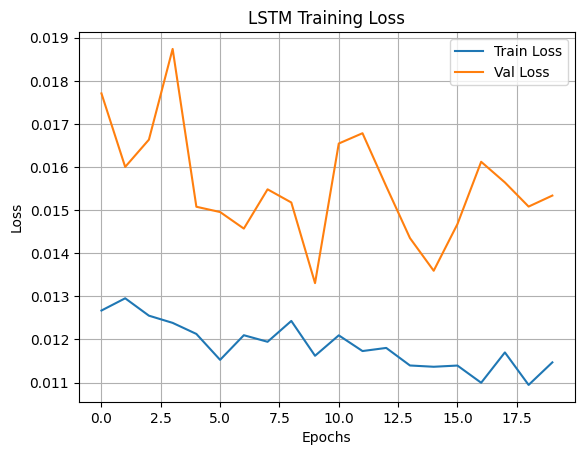

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("LSTM Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


# Save & Deploy

In [13]:
# Save the trained LSTM model to an .h5 file
model.save("lstm_sales_model.h5")
print("✅ Model saved as 'lstm_sales_model.h5'")

✅ Model saved as 'lstm_sales_model.h5'


In [14]:

model.save("lstm_sales_model.h5")
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [15]:
from tensorflow.keras.losses import MeanSquaredError

model.compile(optimizer='adam', loss=MeanSquaredError())

In [16]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)
model.save("lstm_sales_model.h5")

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0101 - val_loss: 0.0068
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0126 - val_loss: 0.0069
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - val_loss: 0.0070
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104 - val_loss: 0.0071
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - val_loss: 0.0073
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - val_loss: 0.0073
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - val_loss: 0.0069
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - val_loss: 0.0069
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - val_loss: 0.0070
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - val_loss: 0.0069
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - val_loss: 0.0069
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - val_

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load model and explicitly pass custom_objects if needed
loaded_model = load_model("lstm_sales_model.h5", custom_objects={'MeanSquaredError': MeanSquaredError})

print("✅ Model loaded successfully.")

✅ Model loaded successfully.


In [18]:
df.to_csv('df.csv', index=False)